<a href="https://colab.research.google.com/github/MohiteAkshay/Traffic-Signal-Image-Classification-Using-CNN/blob/master/Traffic_Signal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Import Dataset and Explore it**

In [3]:
# cloning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [4]:
# list dataset contents
 
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [5]:
#load the dataset

data = pd.read_csv('german-traffic-signs/signnames.csv')

In [7]:
#loading pickled dataset

with open("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)

with open("german-traffic-signs/valid.p",mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)

In [11]:
X_train , y_train = train['features'], train['labels']
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'], test['labels']

In [12]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [16]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

image label=12


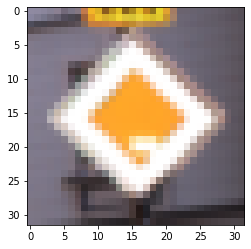

In [15]:
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

#Image Pre-processing
1. Converting to grayscale
2. Histogram Equalization
3. Normalization

In [17]:
#Shuffling the data so that model doesn't capture the sequence of the data
from sklearn.utils import shuffle
X_train , y_train = shuffle(X_train,y_train)


In [18]:
def preprocessing(img): 
  #convert to grayscale
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Applying histogram equalization i.e. Adjusting Brightness of each image
  img = cv2.equalizeHist(img)
  #Normalization
  img = img/255
  return img

In [19]:
X_train_processed = np.array(list(map(preprocessing,X_train)))
X_validation_processed = np.array(list(map(preprocessing,X_validation)))
X_test_processed = np.array(list(map(preprocessing,X_test)))

In [20]:
X_train_processed = X_train_processed.reshape(34799,32,32,1)
X_test_processed = X_test_processed.reshape(12630,32,32,1)
X_validation_processed = X_validation_processed.reshape(4410,32,32,1)

In [21]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(X_validation_processed.shape)


(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


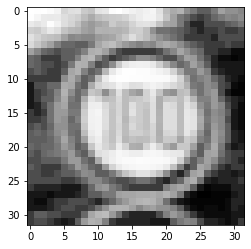

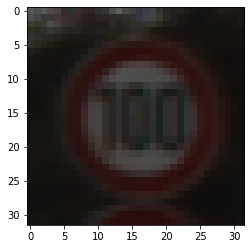

In [22]:
i= random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

# Build Deep Convolution Neural Network Model 

In [23]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,input_shape,activation_function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.25))

# add another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))

# defining the ouput layer of our network
model.add(Dense(43,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [26]:
model.compile(Adam(lr=0.001),metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [27]:
history = model.fit(X_train_processed,
                    y_train,
                    batch_size=500,
                    epochs=70,
                    verbose=1,
                    validation_data=(X_validation_processed,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/70
34799/34799 [==============================] - 7s 212us/step - loss: 2.7257 - accuracy: 0.2795 - val_loss: 1.4819 - val_accuracy: 0.5853
Epoch 2/70
34799/34799 [==============================] - 1s 27us/step - loss: 1.1480 - accuracy: 0.6559 - val_loss: 0.6575 - val_accuracy: 0.8184
Epoch 3/70
34799/34799 [==============================] - 1s 25us/step - loss: 0.6637 - accuracy: 0.7969 - val_loss: 0.4490 - val_accuracy: 0.8619
Epoch 4/70
34799/34799 [==============================] - 1s 25us/step - loss: 0.4638 - accuracy: 0.8579 - val_loss: 0.3411 - val_accuracy: 0.8998
Epoch 5/70
34799/34799 [==============================] - 1s 26us/step - loss: 0.3573 - accuracy: 0.8905 - val_loss: 0.3038 - val_accuracy: 0.9079
Epoch 6/70
34799/34799 [==============================] - 1s 26us/step - loss: 0.2860 - accuracy: 0.9135 - val_loss: 0.2442 - val_accuracy: 0.9252
Epoch 7/70
34799/34799 [==============================] - 1s 26us/st

# Evaluate Performance of the model

In [28]:
score = model.evaluate(X_test_processed,y_test)
print('Test accuracy',score[1])

12630/12630 [==============================] - 1s 78us/step
Test accuracy 0.9504354596138


In [29]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

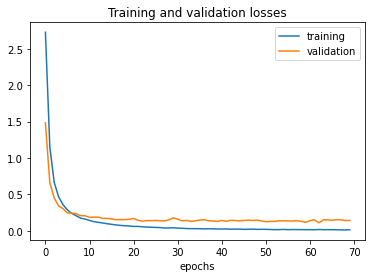

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

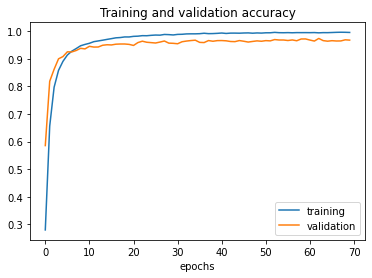

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [33]:
prediction = model.predict_classes(X_test_processed)
y_true_label= y_test

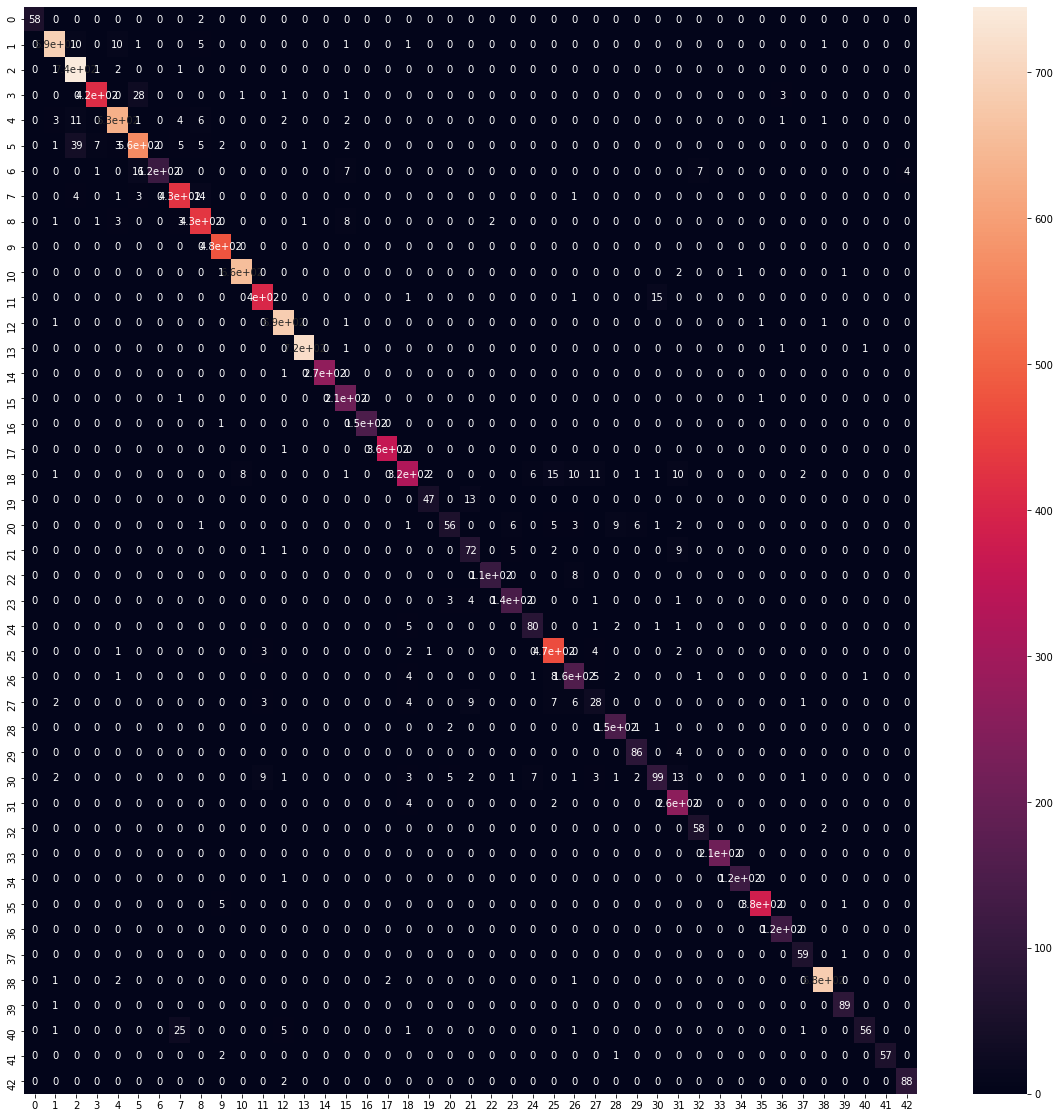

In [34]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

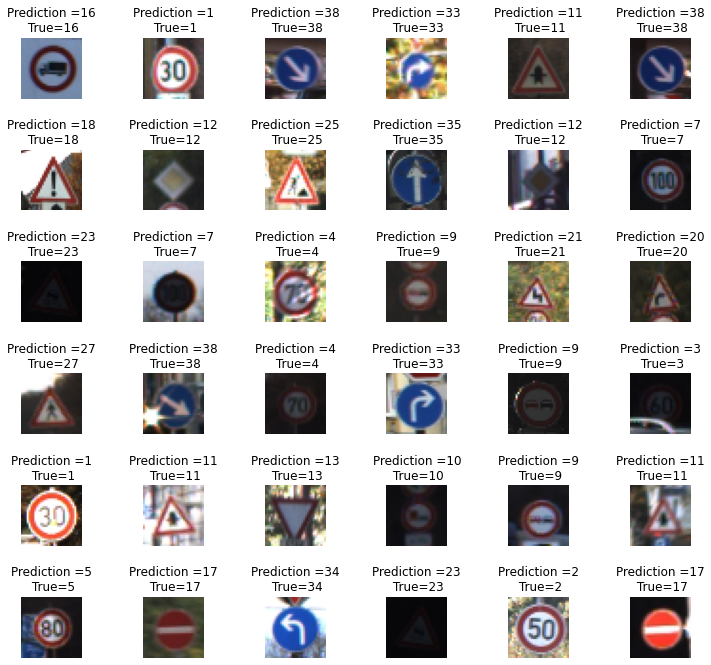

In [35]:
L=6
W=6
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [36]:
model.save('my_model.h5')